In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from data import fraud_dataset

Using backend: pytorch


In [4]:
# Define some constants for the exploration

DATASET_NAME = "amazon" # "amazon" or "yelp"
TRAIN_SIZE = 0.4
VAL_SIZE = 0.1
RANDOM_SEED = 42
FORCE_RELOAD = False

In [5]:
fraud_data = fraud_dataset.FraudDataset(
    DATASET_NAME, 
    train_size=TRAIN_SIZE, 
    val_size=VAL_SIZE, 
    random_seed=RANDOM_SEED, 
    force_reload=FORCE_RELOAD
)
graph = fraud_data[0]

Done saving data into cached files.


Node types: ['user']
Edge types: ['net_upu', 'net_usu', 'net_uvu']
Number of user nodes: 11944
Number of net_upu edges: 351216
Number of net_usu edges: 7132958
Number of net_uvu edges: 2073474
net_upu edge info:
Source nodes: [ 2696  2803  4850 ...  3153  4622 11942]
Destination nodes: [    1     2     2 ... 11943 11943 11943]
net_usu edge info:
Source nodes: [   74   139   317 ... 11882 11891 11942]
Destination nodes: [    0     0     0 ... 11943 11943 11943]
net_uvu edge info:
Source nodes: [ 2486  4857  5009 ... 11517 11941 11942]
Destination nodes: [    0     0     0 ... 11943 11943 11943]


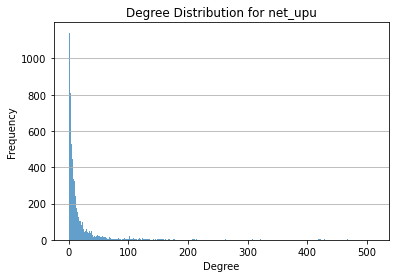

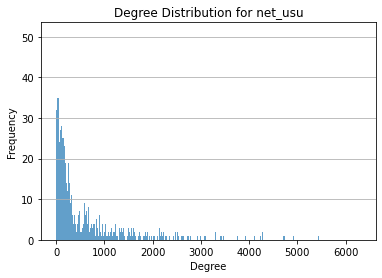

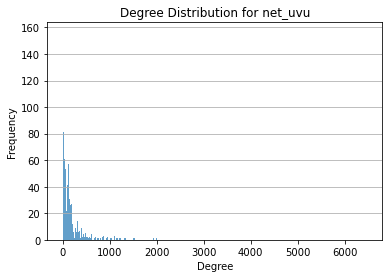

In [23]:
# Print details about the heterogeneous graph
print("Node types:", graph.ntypes)
print("Edge types:", graph.etypes)

# Number of nodes and edges per type
for ntype in graph.ntypes:
    print(f"Number of {ntype} nodes:", graph.num_nodes(ntype))

for etype in graph.etypes:
    print(f"Number of {etype} edges:", graph.num_edges(etype))

# Examine connectivity in the heterogeneous graph
for etype in graph.etypes:
    print(f"{etype} edge info:")
    src, dst = graph.edges(etype=etype)
    print(f"Source nodes: {src.numpy()}")
    print(f"Destination nodes: {dst.numpy()}")

# Compute degree distribution for each edge type
for etype in graph.etypes:
    _, dst = graph.edges(etype=etype)
    unique, counts = np.unique(dst.numpy(), return_counts=True)
    
    plt.figure()
    plt.hist(counts, bins=np.arange(counts.min(), counts.max() + 1) - 0.5, alpha=0.7)
    plt.title(f'Degree Distribution for {etype}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

In [13]:

g.ndata["feature"].shape

torch.Size([11944, 25])